<a href="https://colab.research.google.com/github/zaraycr/Curso_de_lenguajes_de_programaci-n/blob/main/Concurso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Subir los datos

In [52]:
import pandas as pd

# Enlace CSV público de tu hoja de cálculo de Google Sheets
url = "https://docs.google.com/spreadsheets/d/1HfkMQwmoKERukeO6ttJWeyxbH1jHpmL7/export?format=csv&gid=1069729667"

# Leer directamente desde Google Sheets
df = pd.read_csv(url)

# Si tiene una columna de fecha, conviértela y ordénala
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Verifica los datos cargados
print(df.head())

            PFBCOLO   BCOLO   ECOPETL    ISA     GEB   CEMARGOS   GRUPOARG   \
Date                                                                          
2010-01-29     21760   22200      2455  12680  1198.0   6495.366      19980   
2010-02-26     22220   22300      2560  12880  1234.0   6506.432      19300   
2010-03-31     22280   22280      2700  12800  1250.0   6628.151      19800   
2010-04-30     23000   23020      2765  12980  1290.0   6373.647      19400   
2010-05-31     23500   23500      2700  12720  1275.4   6218.732      19200   

            PFGRUPSU   PFGRUPOA   PEI   ...  CORFICOL   GRUPOBOL    PROMIG   \
Date                                    ...                                   
2010-01-29        NaN        NaN   NaN  ...  10950.195      40000  4292.245   
2010-02-26        NaN        NaN   NaN  ...  12686.790      40000  4172.684   
2010-03-31        NaN        NaN   NaN  ...  13800.060      42500  4182.249   
2010-04-30        NaN        NaN   NaN  ...  14906.

In [53]:
# leer excel
df = pd.read_excel(ruta_excel)

In [54]:
df.head()

,Date,PFBCOLO,BCOLO,ECOPETL,ISA,GEB,CEMARGOS,GRUPOARG,PFGRUPSU,PFGRUPOA,...,CORFICOL,GRUPOBOL,PROMIG,BOGOTA,MINEROS,TERPEL,PFCORCOL,CNEC,ETB,COLCAP
0,2010-01-29,21760,22200,2455,12680,1198.0,6495.366,19980,NaN,NaN,...,10950.195,40000,4292.245,31473.509,5500,NaN,11264.812,NaN,1140.0,1363.67
1,2010-02-26,22220,22300,2560,12880,1234.0,6506.432,19300,NaN,NaN,...,12686.790,40000,4172.684,34898.567,5550,NaN,12330.403,NaN,1005.0,1391.02
2,2010-03-31,22280,22280,2700,12800,1250.0,6628.151,19800,NaN,NaN,...,13800.060,42500,4182.249,34528.290,5720,NaN,13540.856,NaN,1040.0,1440.58
3,2010-04-30,23000,23020,2765,12980,1290.0,6373.647,19400,NaN,NaN,...,14906.857,40600,4208.552,36842.519,5720,NaN,14579.233,NaN,1155.0,1467.26
4,2010-05-31,23500,23500,2700,12720,1275.4,6218.732,19200,NaN,NaN,...,14468.126,41420,4184.640,35916.827,5700,NaN,14159.686,NaN,1075.0,1444.54


In [55]:
df.dtypes

,0
Date,datetime64[ns]
PFBCOLO,int64
BCOLO,int64
ECOPETL,int64
ISA,int64
GEB,float64
CEMARGOS,float64
GRUPOARG,int64
PFGRUPSU,float64
PFGRUPOA,float64


In [26]:
# Define a function to load the data
def load_data(ruta_excel):
    try:
        df = pd.read_excel(ruta_excel)
        df = df.sort_values('Date')
        df = df.drop_duplicates(subset=['Date'], keep='first')
        df.set_index('Date', inplace=True)
        df = df.dropna(axis=1, how='all')
        return df
    except Exception as e:
        print(f"Error al cargar los datos: {e}")
        return None

# Now call the function with your file path
ruta_excel = "/content/drive/MyDrive/BD2025_01.xlsx"
df = load_data(ruta_excel)

# You can then check if the dataframe was loaded successfully
if df is not None:
    df.head()
    df.dtypes
else:
    print("No se pudo cargar el DataFrame.")

# 2. Calcular rentabilidades mensuales

In [13]:
## 2. Cálculo de rentabilidades mensuales
# Seleccionar solo las columnas numéricas para calcular la rentabilidad
numeric_df = df.select_dtypes(include='number')

# Calcular la rentabilidad mensual solo en las columnas numéricas
rent_mensual = numeric_df.pct_change().dropna()
rent_mensual.head()

,PFBCOLO,BCOLO,ECOPETL,ISA,GEB,CEMARGOS,GRUPOARG,PFGRUPSU,PFGRUPOA,PEI,...,CORFICOL,GRUPOBOL,PROMIG,BOGOTA,MINEROS,TERPEL,PFCORCOL,CNEC,ETB,COLCAP
152,-0.083715,-0.090643,-0.081081,-0.139280,-0.015263,-0.031241,0.006154,-0.175258,-0.095023,-0.205447,...,-0.143590,-0.039804,-0.120000,-0.286500,-0.137019,0.032526,-0.148265,-0.226438,-0.027684,-0.081485
153,0.115275,0.141479,0.181292,0.167879,-0.119722,-0.014793,0.044852,0.067187,-0.016667,-0.059745,...,-0.035928,0.147641,0.040670,-0.088998,-0.064067,-0.008030,-0.059259,0.142405,-0.180556,0.091541
154,0.023680,0.126761,-0.065306,0.011936,0.092896,0.051952,-0.034146,-0.048316,0.057627,-0.086458,...,-0.017391,0.106762,0.080460,0.230769,0.017857,0.013699,0.023622,0.004155,0.016949,0.009021
155,0.048765,0.062500,0.056769,0.076923,-0.065000,0.027691,-0.041414,0.015385,0.017628,0.020239,...,-0.051833,-0.019293,-0.029787,0.156250,0.081871,-0.013514,-0.007692,0.006207,-0.100000,0.034958
156,0.057824,-0.012000,0.102893,-0.093333,-0.067142,-0.107500,-0.013172,-0.069697,-0.133858,-0.033250,...,0.066667,0.000000,-0.002193,-0.042703,0.237838,0.018680,0.038760,0.104044,0.101852,0.003141


# 3. Cálculos agregados sobre rentabilidades

In [37]:
## 3. Cálculos agregados
rent_promedio = rent_mensual.mean()
rent_min = rent_mensual.min()
rent_max = rent_mensual.max()

# Seleccionar solo las columnas numéricas para calcular la rentabilidad acumulada
numeric_df_for_acumulada = df.select_dtypes(include='number')

# Calcular la rentabilidad acumulada total solo en las columnas numéricas
# Dividir los valores de la última fila por los valores de la primera fila, excluir la primera columna si es 'Date'
rent_acumulada = ((numeric_df_for_acumulada.iloc[-1] / numeric_df_for_acumulada.iloc[0]) - 1) * 100

In [29]:
def calcular_estadisticas(df, rentabilidades):
    """Calcula diversas estadísticas sobre las rentabilidades"""
    # Rentabilidad promedio mensual
    rent_promedio = rentabilidades.mean() * 100
     # Rentabilidad mínima y máxima
    rent_min = rentabilidades.min() * 100
    rent_max = rentabilidades.max() * 100

    # Rentabilidad acumulada total
    precio_inicial = df.iloc[0]
    precio_final = df.iloc[-1]
    rent_acumulada = ((precio_final / precio_inicial - 1) * 100)

    # Desviación estándar (volatilidad)
    volatilidad = rentabilidades.std() * 100

    # Meses con rentabilidad negativa
    meses_negativos = (rentabilidades < 0).sum()

    # Porcentaje de meses con rentabilidad positiva
    porcentaje_positivos = ((rentabilidades > 0).sum() / len(rentabilidades)) * 100

    # Crear DataFrame con todas las estadísticas
    stats = pd.DataFrame({
        'Rentabilidad Promedio (%)': rent_promedio,
        'Rentabilidad Mínima (%)': rent_min,
        'Rentabilidad Máxima (%)': rent_max,
        'Rentabilidad Acumulada (%)': rent_acumulada,
        'Volatilidad (%)': volatilidad,
        'Meses con Rentabilidad Negativa': meses_negativos,
        '% Meses con Rentabilidad Positiva': porcentaje_positivos
    })

    return stats

# 4. Análisis exploratorio

In [39]:
## 4. Análisis exploratorio
mejor_promedio = rent_promedio.idxmax()
mayor_valor_mensual = rent_mensual.max().idxmax()
mayor_valor = rent_mensual.max().max()
mejor_acumulada = rent_acumulada.idxmax()
meses_negativos = (rent_mensual < 0).sum()
volatilidad = rent_mensual.std()
mas_volatil = volatilidad.idxmax()
porcentaje_positivos = (rent_mensual > 0).sum() / len(rent_mensual)
acciones_positivas_70 = porcentaje_positivos[porcentaje_positivos > 0.7].index.tolist()
print("Mayor rentabilidad promedio mensual:", mejor_promedio)
print("Mayor rentabilidad mensual observada:", mayor_valor, "en", mayor_valor_mensual)
print("Mayor rentabilidad acumulada:", mejor_acumulada)
print("Acción más volátil:", mas_volatil)
print("Acciones con más del 70% de meses positivos:", acciones_positivas_70)

Mayor rentabilidad promedio mensual: CEMARGOS 
Mayor rentabilidad mensual observada: 0.6919365954514127 en CEMARGOS 
Mayor rentabilidad acumulada: GEB 
Acción más volátil: CEMARGOS 
Acciones con más del 70% de meses positivos: []


# 5. Visualización de resultados

In [17]:
# a. Rentabilidad mensual de 3 acciones
# Imprimir los nombres de las columnas de rent_mensual para verificar
print("Columnas disponibles en rent_mensual:", rent_mensual.columns.tolist())

# Define las acciones seleccionadas utilizando los nombres de columna correctos de tu DataFrame
# Reemplaza los nombres en la lista siguiente con los nombres exactos de tu DataFrame
acciones_seleccionadas = ['NombreAccion1', 'NombreAccion2', 'NombreAccion3'] # **CAMBIA ESTOS NOMBRES**

# Asegúrate de que las acciones seleccionadas realmente existan en las columnas antes de intentar graficar
acciones_existentes = [accion for accion in acciones_seleccionadas if accion in rent_mensual.columns]

if acciones_existentes:
    rent_mensual[acciones_existentes].plot(figsize=(12,6), title="Rentabilidad Mensual")
    plt.ylabel('Rentabilidad mensual')
    plt.show()
else:
    print("Ninguna de las acciones seleccionadas fue encontrada en el DataFrame.")

Columnas disponibles en rent_mensual: ['PFBCOLO ', 'BCOLO ', 'ECOPETL ', 'ISA ', 'GEB ', 'CEMARGOS ', 'GRUPOARG ', 'PFGRUPSU ', 'PFGRUPOA ', 'PEI ', 'PFAVAL ', 'GRUPOSUR ', 'PFDAVVND ', 'CELSIA ', 'CORFICOL ', 'GRUPOBOL ', 'PROMIG ', 'BOGOTA ', 'MINEROS ', 'TERPEL ', 'PFCORCOL ', 'CNEC ', 'ETB ', 'COLCAP']
Ninguna de las acciones seleccionadas fue encontrada en el DataFrame.


In [41]:
import matplotlib.pyplot as plt # Asegúrate de que pyplot esté importado

# a. Rentabilidad mensual de 3 acciones
# Imprimir los nombres de las columnas de rent_mensual para verificar
print("Columnas disponibles en rent_mensual:", rent_mensual.columns.tolist())

# Define las acciones seleccionadas utilizando los nombres de columna correctos de tu DataFrame
# **ACTUALIZA LOS NOMBRES EN LA SIGUIENTE LISTA CON LOS NOMBRES REALES DE TU DataFrame**
acciones_seleccionadas = ['ECOPETL', 'ISA', 'GRUPOARG']  # Asegúrate de que estos nombres coincidan exactamente con las columnas impresas arriba.

# Asegúrate de que las acciones seleccionadas realmente existan en las columnas antes de intentar graficar
acciones_existentes = [accion for accion in acciones_seleccionadas if accion in rent_mensual.columns]

if acciones_existentes:
    rent_mensual[acciones_existentes].plot(figsize=(12,6), title="Rentabilidad Mensual")
    plt.ylabel('Rentabilidad mensual')
    plt.show()
else:
    print("Ninguna de las acciones seleccionadas fue encontrada en el DataFrame. Por favor, verifica los nombres de las columnas.")

Columnas disponibles en rent_mensual: ['PFBCOLO ', 'BCOLO ', 'ECOPETL ', 'ISA ', 'GEB ', 'CEMARGOS ', 'GRUPOARG ', 'PFGRUPSU ', 'PFGRUPOA ', 'PEI ', 'PFAVAL ', 'GRUPOSUR ', 'PFDAVVND ', 'CELSIA ', 'CORFICOL ', 'GRUPOBOL ', 'PROMIG ', 'BOGOTA ', 'MINEROS ', 'TERPEL ', 'PFCORCOL ', 'CNEC ', 'ETB ', 'COLCAP']
Ninguna de las acciones seleccionadas fue encontrada en el DataFrame. Por favor, verifica los nombres de las columnas.


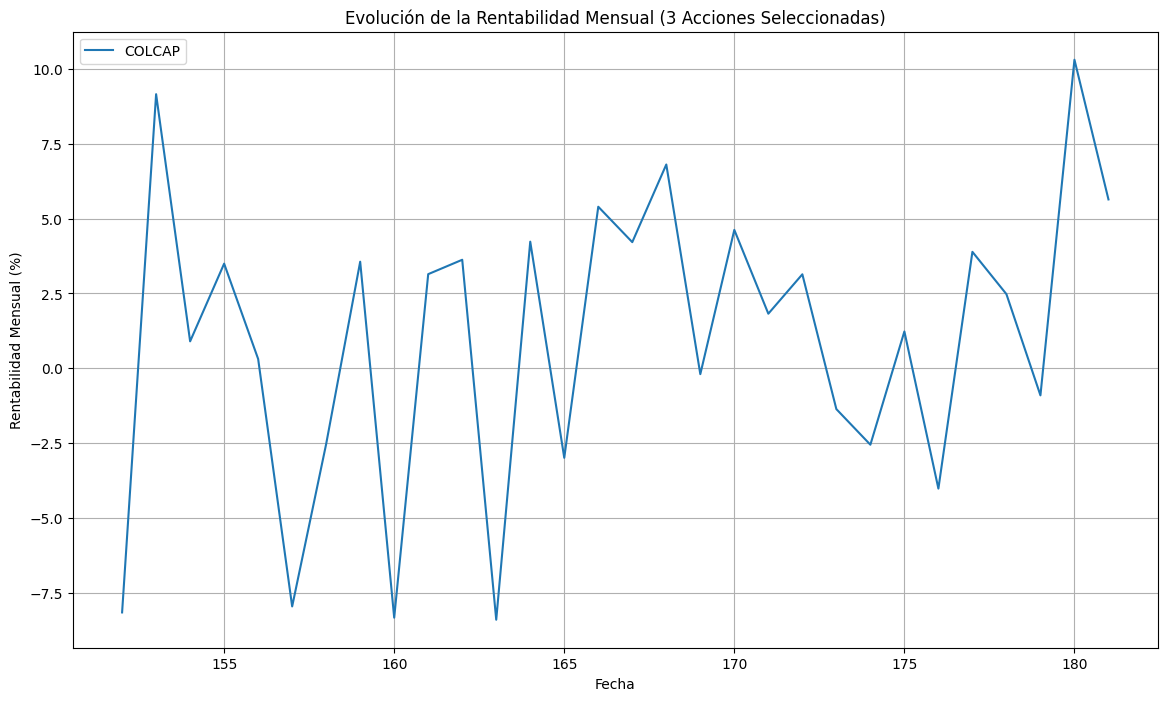

In [49]:
# Configurar el tamaño de las figuras
plt.figure(figsize=(14, 8))

# Gráficos de líneas: Evolución de la rentabilidad mensual de 3 acciones seleccionadas
acciones_seleccionadas = ['COLCAP', 'ECOPETL', 'PFCORCOL']

# Filter selected actions to only include those present in rent_mensual columns
acciones_existentes = [accion for accion in acciones_seleccionadas if accion in rent_mensual.columns]

if acciones_existentes:
    for accion in acciones_existentes:
        # Make sure the code inside the loop is indented correctly relative to the 'for' line
        # Use rent_mensual instead of the undefined rentabilidades
        plt.plot(rent_mensual.index, rent_mensual[accion] * 100, label=accion)

    plt.title('Evolución de la Rentabilidad Mensual (3 Acciones Seleccionadas)')
    plt.xlabel('Fecha')
    plt.ylabel('Rentabilidad Mensual (%)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Ninguna de las acciones seleccionadas para graficar fue encontrada en el DataFrame de rentabilidades.")

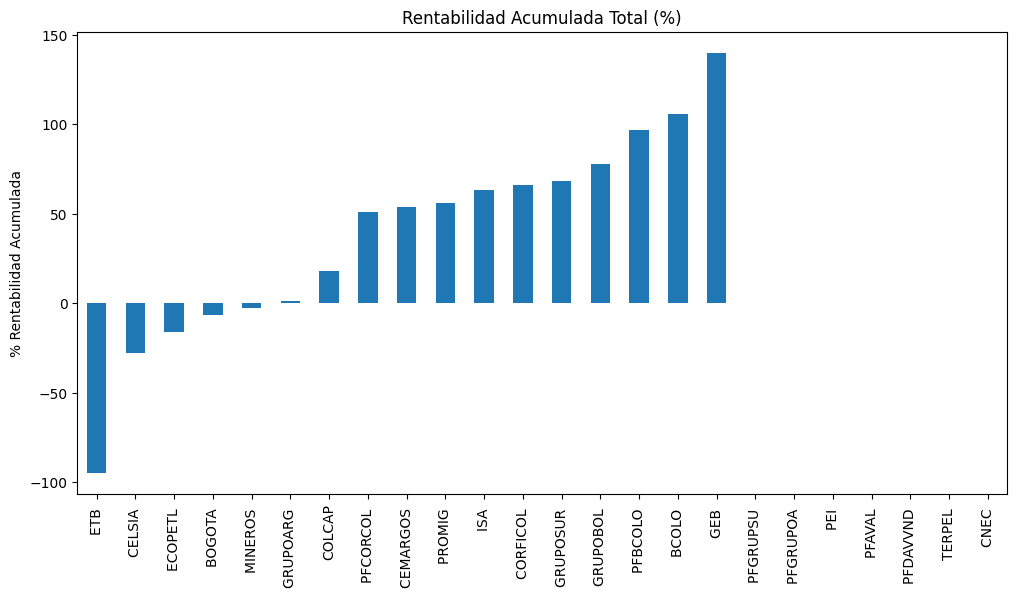

In [18]:
# b. Rentabilidad acumulada total
import matplotlib.pyplot as plt # Importar pyplot
import matplotlib # Importar matplotlib

rent_acumulada.sort_values().plot(kind='bar', figsize=(12,6), title="Rentabilidad Acumulada Total (%)")
plt.ylabel('% Rentabilidad Acumulada')
plt.show()

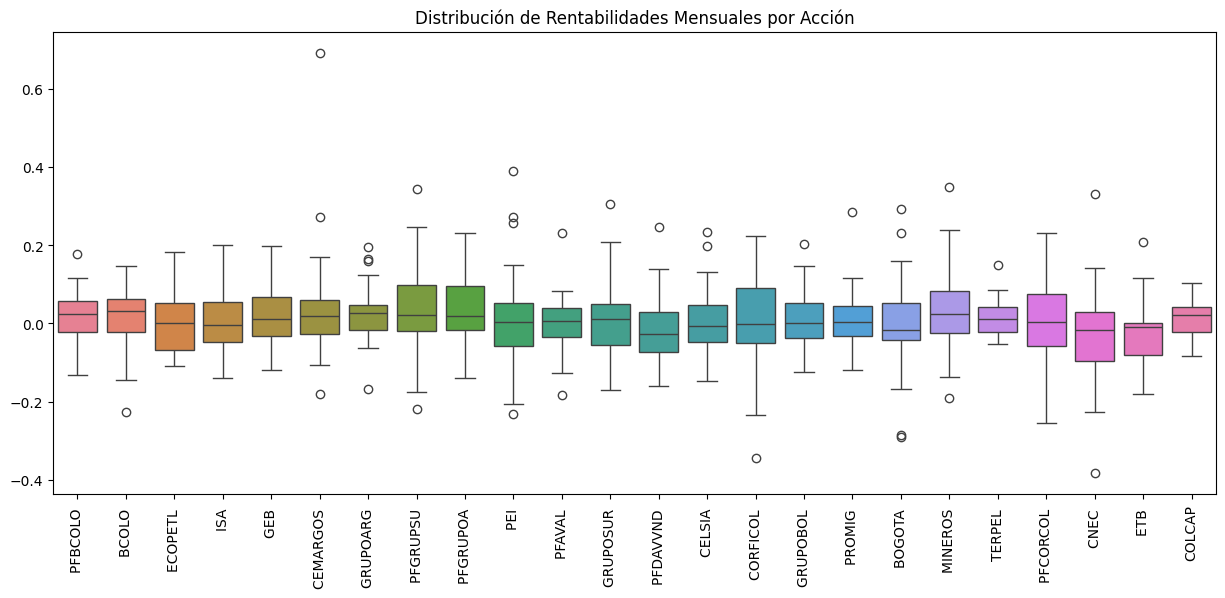

In [43]:
import matplotlib.pyplot as plt # Ensure pyplot is imported
import seaborn as sns # Import the seaborn library

# c. Boxplots por acción
plt.figure(figsize=(15,6))
sns.boxplot(data=rent_mensual)
plt.xticks(rotation=90)
plt.title("Distribución de Rentabilidades Mensuales por Acción")
plt.show()

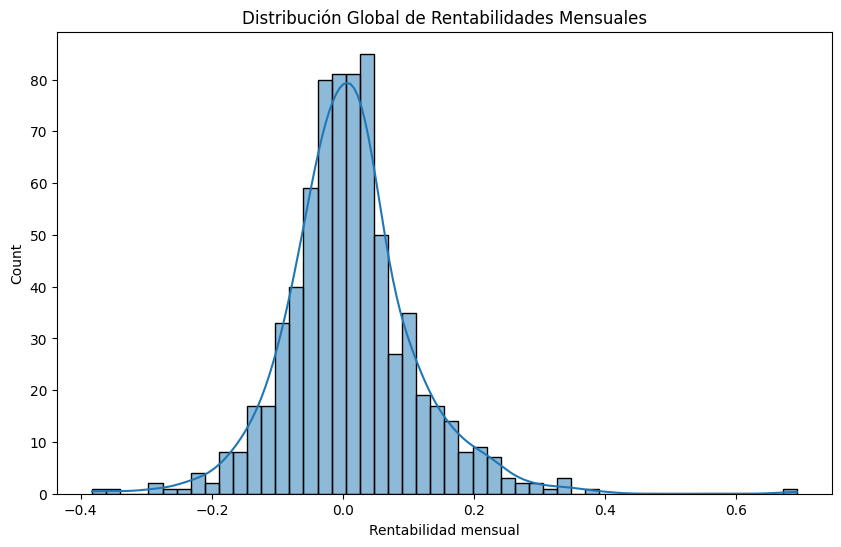

In [44]:
# d. Histograma global
plt.figure(figsize=(10,6))
sns.histplot(rent_mensual.values.flatten(), bins=50, kde=True)
plt.title("Distribución Global de Rentabilidades Mensuales")
plt.xlabel('Rentabilidad mensual')
plt.show()